# Logistic regression from scratch in python

In [58]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [59]:
# load data
path = os.getcwd()
for i in range(3):
    path = os.path.dirname(path)
data = pd.read_excel( path + '/Datasets/Titanic_Dataset.xlsx')

In [60]:
data.head(10)

,Passengerid,Age,Fare,Sex,sibsp,Parch,zero,Pclass,Embarked,Survived
0,1,22.0,7.2500,0,1,0,0,3,2,0
1,2,38.0,71.2833,1,1,0,0,1,0,1
2,3,26.0,7.9250,1,0,0,0,3,2,1
3,4,35.0,53.1000,1,1,0,0,1,2,1
4,5,35.0,8.0500,0,0,0,0,3,2,0
5,6,28.0,8.4583,0,0,0,0,3,1,0
6,7,54.0,51.8625,0,0,0,0,1,2,0
7,8,2.0,21.0750,0,3,1,0,3,2,0
8,9,27.0,11.1333,1,0,2,0,3,2,1
9,10,14.0,30.0708,1,1,0,0,2,0,1


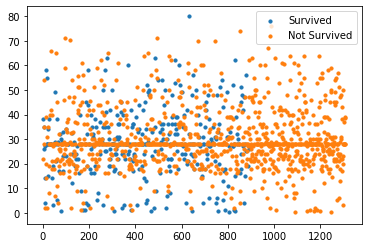

In [61]:
# X = feature values, all the columns except the last column
X = data.iloc[:,:-1] 

# y = target column, Survived for this example
y = data.iloc[:,-1]

# filter out the passangers that are survived and not survived

survived = data.loc[y==1]
not_survived = data.loc[y==0]

# plot scatter graph
plt.scatter(survived.iloc[:, 0], survived.iloc[:, 1], s=10, label='Survived')
plt.scatter(not_survived.iloc[:, 0], not_survived.iloc[:, 1], s=10, label='Not Survived')
plt.legend()
plt.show()

In [62]:
# prepare data for training

X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]
theta = np.zeros((X.shape[1], 1))

In [63]:
X

array([[1.000e+00, 1.000e+00, 2.200e+01, ..., 0.000e+00, 3.000e+00,
        2.000e+00],
       [1.000e+00, 2.000e+00, 3.800e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.000e+00, 3.000e+00, 2.600e+01, ..., 0.000e+00, 3.000e+00,
        2.000e+00],
       ...,
       [1.000e+00, 1.307e+03, 3.850e+01, ..., 0.000e+00, 3.000e+00,
        2.000e+00],
       [1.000e+00, 1.308e+03, 2.800e+01, ..., 0.000e+00, 3.000e+00,
        2.000e+00],
       [1.000e+00, 1.309e+03, 2.800e+01, ..., 0.000e+00, 3.000e+00,
        0.000e+00]])

In [64]:
y

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [65]:
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)


In [69]:
X_test

array([[  1., 202.,  28., ...,   0.,   3.,   2.],
       [  1., 116.,  21., ...,   0.,   3.,   2.],
       [  1., 256.,  29., ...,   0.,   3.,   0.],
       ...,
       [  1., 181.,  28., ...,   0.,   3.,   2.],
       [  1., 192.,  19., ...,   0.,   2.,   2.],
       [  1., 349.,   3., ...,   0.,   3.,   2.]])

In [70]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [71]:
def net_input(theta, x):
    return np.dot(x, theta)

In [72]:
def probability(theta, x):
    return sigmoid(net_input(theta, x))

In [73]:
def cost_function(theta, x, y):
    m = x.shape[0]
    total_cost = -(1/m) * np.sum(y * np.log(probability(theta, x)) + (1-y)*np.log(1-probability(theta, x)))
    return total_cost

In [74]:
def gradient(theta, x, y):
    
    m = x.shape[0]
    return (1/m)* np.dot(x.T, sigmoid(net_input(theta, x)) - y)

In [75]:
from scipy.optimize import fmin_tnc
def fit(x, y, theta):
    opt_wights = fmin_tnc(func=cost_function, x0 = theta, fprime=gradient, args=(x, y.flatten()))
    return opt_wights[0]

In [105]:
parameters = fit(X_train, y_train, theta)

In [77]:
parameters

array([ 3.42201479e+00, -3.13508993e-03, -4.31666247e-02,  3.13920111e-04,
        2.46135485e+00, -4.14907149e-01,  5.94713711e-02,  0.00000000e+00,
       -1.09894848e+00, -4.41111863e-02])

In [78]:
# Accuracy of the model

def predict(x):
    theta = parameters[:,np.newaxis]
    return probability(theta, x)

def accuracy(x, actual_classes, probab_threshold = 0.5):
    predicted_classes = (predict(x) >= probab_threshold).astype(int)
    predicted_classes = predicted_classes.flatten()
    accuracy = np.mean(predicted_classes == actual_classes)
    
    return accuracy * 100


In [80]:
accuracy(X_test, y_test.flatten())

79.89821882951654

In [102]:
# confusion matrix
from sklearn.metrics import classification_report

predictions = (predict(X_test) >= 0.5).astype(int)

clf_report = classification_report(y_test, predictions)

In [103]:
print(clf_report)

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       277
           1       0.75      0.47      0.58       116

    accuracy                           0.80       393
   macro avg       0.78      0.70      0.72       393
weighted avg       0.79      0.80      0.78       393



In [104]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test,predictions)
print(cnf_matrix)

[[259  18]
 [ 61  55]]
